In [1]:
import numpy as np 
import pandas as pd 

In [2]:
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.width', None)  
pd.set_option('display.max_colwidth', None)

In [3]:
df = pd.read_csv('../data/processed/data_after_feature_engineering2.csv')

In [4]:
df.head(3)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0


In [5]:
import statsmodels.api

### Linear Regression (Let's tune more)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Value'])
y = df['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print (f'MSE: {mean_squared_error(y_test, y_pred)}')
print (f'R2 Score: {r2_score(y_test, y_pred)}')

MSE: 0.04935585578959542
R2 Score: 0.9732187449649624


In [7]:
comparison_df = pd.DataFrame({'Original': y_test, 'Predicted': y_pred})
print(comparison_df)

       Original  Predicted
596   16.012735  16.051007
3370  15.424949  15.357540
3048  16.118096  15.636681
2908  16.860033  16.580774
8     13.910822  14.108815
577   16.556351  16.175697
2867  15.319588  15.385031
811   16.066802  16.050955
3509  14.077876  14.108643
1538  14.557448  14.705092
3121  15.520259  15.348604
3066  15.226498  15.139133
2481  15.009433  14.987241
2314  12.834684  12.584077
227   15.687313  16.019364
296   16.380460  16.305769
4327  13.017005  12.533607
1020  15.384127  15.736089
2520  15.009433  15.347313
3857  13.592368  13.564117
1480  16.454568  16.329696
534   16.972511  16.593690
4355  13.764218  13.710145
3337  13.815512  14.075685
1874  15.520259  15.473043
2809  14.220976  14.196509
3595  13.017005  12.969825
759   16.523561  16.437513
3729  13.652993  13.627156
805   16.588099  16.373775
4260  14.151984  13.922816
3285  14.808763  14.701159
828   16.906553  16.538769
4720  12.765691  12.458428
4250  12.691584  12.501034
2899  13.997833  14.030191
2

In [8]:
y_pred_original = np.exp(y_pred)

comparison_df_original = pd.DataFrame({'Original': np.exp(y_test), 'Predicted': y_pred_original})
print(comparison_df_original)

         Original     Predicted
596     9000001.0  9.351123e+06
3370    5000001.0  4.674068e+06
3048   10000001.0  6.179086e+06
2908   21000001.0  1.588322e+07
8       1100001.0  1.340851e+06
577    15500001.0  1.059292e+07
2867    4500001.0  4.804342e+06
811     9500001.0  9.350636e+06
3509    1300001.0  1.340620e+06
1538    2100001.0  2.434111e+06
3121    5500001.0  4.632487e+06
3066    4100001.0  3.757007e+06
2481    3300001.0  3.227573e+06
2314     375001.0  2.918739e+05
227     6500001.0  9.059859e+06
296    13000001.0  1.206440e+07
4327     450001.0  2.775086e+05
1020    4800001.0  6.824908e+06
2520    3300001.0  4.626508e+06
3857     800001.0  7.777165e+05
1480   14000001.0  1.235654e+07
534    23500001.0  1.608970e+07
4355     950001.0  8.999956e+05
3337    1000001.0  1.297156e+06
1874    5500001.0  5.246348e+06
2809    1500001.0  1.463745e+06
3595     450001.0  4.292628e+05
759    15000001.0  1.376326e+07
3729     850001.0  8.283210e+05
805    16000001.0  1.291339e+07
4260    

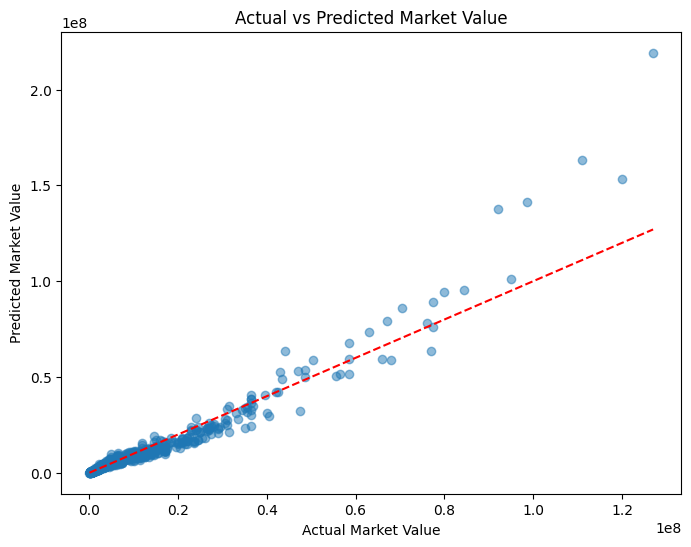

In [9]:
import matplotlib.pyplot as plt

actual_values = np.exp(y_test)
predicted_values = y_pred_original

plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, alpha=0.5)
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], color='red', linestyle='dashed')  # perfect predictions line
plt.xlabel("Actual Market Value")
plt.ylabel("Predicted Market Value")
plt.title("Actual vs Predicted Market Value")
plt.show()


In [10]:
df.head(5)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0
3,16,64,62,82,1,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,1,0,14.150029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,66.8,56.8,31.4,8.2,0.0,1.0,0.0,0.0
4,33,89,89,89,1,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,0.924051,95,84,55,94,83.0,0.975309,86,93.0,83,93,92,0.677686,66,70,53.0,66,75,0.107728,15,13,5.0,10,13,0.955182,88,94.0,83.0,88.0,0.871383,92,90,2292,5,0,16.651179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,79.2,89.8,66.0,11.2,0.0,0.0,0.0,1.0


## 1. Detecting Outliers

I have already applied log transformation to some of the features, but I want to investigate further to see if there are any additional features that could benefit from this transformation.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
df.head(5)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0
3,16,64,62,82,1,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,1,0,14.150029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,66.8,56.8,31.4,8.2,0.0,1.0,0.0,0.0
4,33,89,89,89,1,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,0.924051,95,84,55,94,83.0,0.975309,86,93.0,83,93,92,0.677686,66,70,53.0,66,75,0.107728,15,13,5.0,10,13,0.955182,88,94.0,83.0,88.0,0.871383,92,90,2292,5,0,16.651179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,79.2,89.8,66.0,11.2,0.0,0.0,0.0,1.0


In [13]:
num_cols = [
    "Age", "Best overall", "Overall rating", "Potential", "Value", "Wage",
    "Height_cm", "Weight_kg", "Acceleration", "Sprint speed", "Agility",
    "Reactions", "Balance", "Stamina", "Strength", "Jumping", "Total attacking",
    "Crossing", "Finishing", "Heading accuracy", "Short passing", "Volleys",
    "Total skill", "Dribbling", "Curve", "FK Accuracy", "Long passing",
    "Ball control", "Total defending", "Defensive awareness", "Standing tackle",
    "Sliding tackle", "Interceptions", "Aggression", "Total goalkeeping",
    "GK Diving", "GK Handling", "GK Kicking", "GK Positioning", "GK Reflexes",
    "Total mentality", "Att. Position", "Vision", "Penalties", "Composure",
    "Total power", "Shot power", "Long shots", "Total stats",
    "International reputation", "Years left", "Forward Score", "Midfielder Score",
    "Defender Score", "Goalkeeper Score"
]

df_num = df[num_cols]


In [14]:
df.sample(5)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
3412,33,74,74,74,1,14.771022,9.680406,176,77,87,86,88.0,69,79.0,68,64,67.0,0.688608,66,63,50,70,69.0,0.703704,82,75.0,40,62,78,0.301653,38,32,28.0,32,66,0.100703,11,13,6.0,15,8,0.633053,65,66.0,62.0,68.0,0.675241,74,70,1849,2,0,14.875945,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-3,78.4,68.8,38.8,10.6,0.0,1.0,0.0,0.0
92,30,90,90,90,1,18.581949,12.043560,188,86,64,66,66.0,94,73.0,75,86,87.0,1.000000,80,95,91,86,89.0,0.856790,82,82.0,69,79,87,0.433884,46,46,38.0,42,80,0.103044,8,10,11.0,14,11,0.927171,94,86.0,94.0,92.0,0.958199,94,89,2214,5,0,16.787914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,80.2,82.6,51.6,10.8,0.0,1.0,0.0,0.0
520,19,74,72,84,0,15.520259,10.518700,185,78,60,62,63.0,75,68.0,53,42,56.0,0.774684,68,70,67,76,71.0,0.772840,75,73.0,70,72,75,0.450413,47,50,37.0,33,60,0.098361,13,8,11.0,13,7,0.658263,70,72.0,65.0,70.0,0.508039,73,67,1822,1,1,15.947738,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,68.0,69.6,41.8,10.4,0.0,0.0,0.0,1.0
457,20,71,69,79,1,14.880222,8.853808,191,81,61,64,52.0,63,51.0,65,80,81.0,0.475949,40,26,71,60,37.0,0.407407,43,30.0,35,57,52,0.764463,70,72,68.0,69,65,0.081967,14,6,8.0,6,11,0.501401,28,45.0,37.0,60.0,0.549839,50,28,1545,1,0,14.150079,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,48.8,55.8,71.8,9.0,1.0,0.0,0.0,0.0
175,20,80,78,88,1,17.182806,10.645449,194,75,56,55,48.0,77,42.0,64,75,75.0,0.503797,38,23,73,72,39.0,0.476543,56,35.0,22,62,70,0.892562,79,82,80.0,81,81,0.081967,6,12,12.0,9,6,0.619048,28,61.0,35.0,72.0,0.569132,57,39,1650,1,0,16.114387,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,49.4,65.8,79.4,9.0,1.0,0.0,0.0,0.0


In [15]:
from scipy.stats import zscore

z_scores = df[num_cols].apply(zscore)

outliers = (z_scores.abs() > 3).sum().sort_values(ascending=False)
outliers


Total goalkeeping           282
Goalkeeper Score            282
GK Diving                   280
GK Handling                 279
GK Reflexes                 275
GK Positioning              272
GK Kicking                  265
Ball control                185
Short passing               128
Dribbling                   122
Midfielder Score            105
International reputation     88
Total mentality              87
Total attacking              75
Forward Score                73
Sprint speed                 72
Total stats                  70
Acceleration                 65
Years left                   64
Stamina                      64
Composure                    43
Total skill                  43
Long passing                 30
Balance                      28
Agility                      26
Jumping                      21
Potential                    20
Total power                  16
Weight_kg                    15
Age                          12
Shot power                   10
Reaction

In [16]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers_iqr.sort_values(ascending=False)


International reputation    881
Dribbling                   402
Ball control                379
Total goalkeeping           369
Goalkeeper Score            369
GK Kicking                  350
Total attacking             349
GK Diving                   349
GK Handling                 349
GK Reflexes                 349
GK Positioning              349
Att. Position               348
Total mentality             320
Total skill                 316
Stamina                     297
Heading accuracy            295
Short passing               293
Sprint speed                285
Forward Score               269
Midfielder Score            240
Acceleration                228
Total stats                 171
Crossing                    154
Wage                        116
Long passing                100
Composure                    99
Balance                      98
Agility                      86
Total power                  83
Years left                   77
Age                          58
Aggressi

In [17]:
df_cleaned = df[~((df[num_cols] < (Q1 - 3 * IQR)) | (df[num_cols] > (Q3 + 3 * IQR))).any(axis=1)]


In [18]:
df_cleaned.head(5)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0
3,16,64,62,82,1,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,1,0,14.150029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,66.8,56.8,31.4,8.2,0.0,1.0,0.0,0.0
5,25,78,76,81,1,16.118096,10.239996,183,79,68,72,68.0,75,64.0,83,83,84.0,0.655696,59,46,75,76,49.0,0.693827,71,58.0,59,70,75,0.826446,77,75,73.0,78,70,0.096019,12,9,12.0,12,6,0.745098,59,67.0,57.0,73.0,0.700965,60,41,1943,1,0,16.110123,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,63.4,74.2,77.2,10.2,1.0,0.0,0.0,0.0


In [19]:
X_cleaned = df_cleaned.drop(columns=['Value'])
y_cleaned = df_cleaned['Value']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.3, random_state=42)

model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)

y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)

print(f'MSE (cleaned): {mse_cleaned}')
print(f'R2 Score (cleaned): {r2_cleaned}')

MSE (cleaned): 0.0384864276522008
R2 Score (cleaned): 0.9701872165427402


### 2. Checking for multicolinearility

I think the accuracy slightly decreases, so i won't select the model

In [20]:
import plotly.express as px

corr_matrix = df[num_cols].corr()

fig = px.imshow(corr_matrix, text_auto=True, aspect="auto", color_continuous_scale='RdBu_r')
fig.update_layout(title="Correlation Matrix", autosize=False, width=800, height=600)
fig.show()


In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols].dropna())

# Apply PCA
pca = PCA(n_components=40)
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(40)])


In [22]:
X_pca = df_pca
y_pca = df['Value']

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = model_pca.predict(X_test_pca)

mse_pca = mean_squared_error(y_test_pca, y_pred_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print(f'MSE (PCA): {mse_pca}')
print(f'R2 Score (PCA): {r2_pca}')

MSE (PCA): 0.015367945163679463
R2 Score (PCA): 0.9916611139203519


Wow, that's an amazing accuracy with 40 features using PCA! However, there's a twist. Since I will be taking raw inputs from users after deployment, I don't think I can transform all the principal components back to their original form for prediction. Therefore, this accuracy might not be practical. So sad.

In [57]:
import joblib

joblib.dump(pca, '../models/pca_model_0.9916.pkl')


['../models/pca_model_0.9916.pkl']

## 3.  implement ridge & lasso regression 

In [24]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df.head(5)

,Age,Best overall,Overall rating,Potential,foot,Value,Wage,Height_cm,Weight_kg,Acceleration,Sprint speed,Agility,Reactions,Balance,Stamina,Strength,Jumping,Total attacking,Crossing,Finishing,Heading accuracy,Short passing,Volleys,Total skill,Dribbling,Curve,FK Accuracy,Long passing,Ball control,Total defending,Defensive awareness,Standing tackle,Sliding tackle,Interceptions,Aggression,Total goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total mentality,Att. Position,Vision,Penalties,Composure,Total power,Shot power,Long shots,Total stats,International reputation,On Loan,Team_encoded,Best position_CAM,Best position_CB,Best position_CDM,Best position_CF,Best position_CM,Best position_GK,Best position_LB,Best position_LM,Best position_LW,Best position_LWB,Best position_RB,Best position_RM,Best position_RW,Best position_RWB,Best position_ST,Years left,Forward Score,Midfielder Score,Defender Score,Goalkeeper Score,Position Category_Defender,Position Category_Forward,Position Category_Goalkeeper,Position Category_Midfielder
0,22,74,72,84,1,15.520259,10.203629,191,75,65,69,62.0,70,54.0,66,75,79.0,0.559494,59,29,72,66,41.0,0.567901,66,51.0,34,64,67,0.801653,70,75,74.0,70,68,0.091335,12,8,11.0,10,8,0.593838,48,42.0,49.0,64.0,0.588424,52,44,1730,1,0,14.960267,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,56.2,61.0,72.8,9.8,1.0,0.0,0.0,0.0
1,20,78,76,86,1,16.618871,11.066654,180,75,77,73,77.0,72,69.0,77,75,87.0,0.726582,56,67,78,79,53.0,0.740741,77,68.0,52,77,78,0.834711,69,78,80.0,72,78,0.093677,5,10,15.0,12,8,0.806723,75,74.0,54.0,78.0,0.781350,72,65,2059,1,1,14.939842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,73.2,77.0,74.8,10.0,0.0,0.0,0.0,1.0
2,21,77,75,85,1,16.341239,10.491302,173,75,84,85,82.0,76,82.0,78,79,86.0,0.746835,63,75,69,72,62.0,0.644444,76,56.0,46,60,75,0.152893,18,20,24.0,27,77,0.105386,8,14,7.0,14,12,0.694678,76,71.0,62.0,62.0,0.797428,74,64,1874,1,0,16.318711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,78.8,71.2,33.6,11.0,0.0,1.0,0.0,0.0
3,16,64,62,82,1,13.910822,7.601402,185,78,74,74,73.0,54,77.0,68,65,70.0,0.584810,51,61,57,56,52.0,0.548148,63,54.0,51,43,63,0.177686,22,21,25.0,24,56,0.072600,12,10,8.0,5,6,0.535014,63,54.0,59.0,63.0,0.620579,62,61,1594,1,0,14.150029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,66.8,56.8,31.4,8.2,0.0,1.0,0.0,0.0
4,33,89,89,89,1,17.966550,12.506181,181,75,67,67,75.0,92,78.0,76,75,71.0,0.924051,95,84,55,94,83.0,0.975309,86,93.0,83,93,92,0.677686,66,70,53.0,66,75,0.107728,15,13,5.0,10,13,0.955182,88,94.0,83.0,88.0,0.871383,92,90,2292,5,0,16.651179,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,79.2,89.8,66.0,11.2,0.0,0.0,0.0,1.0


In [26]:
X = df.drop(columns=['Value']) 
y = df['Value']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge = Ridge(alpha=100) 
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)

print(f'Ridge Regression R²: {ridge_r2:.4f}')
print(f'Ridge Regression RMSE: {ridge_rmse:.4f}')

Ridge Regression R²: 0.9732
Ridge Regression RMSE: 0.2223


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [55]:
joblib.dump(ridge, '../models/ridge_model_0.9732.pkl')

['../models/ridge_model_0.9732.pkl']

In [34]:
from sklearn.linear_model import Lasso

In [35]:
lasso = Lasso(alpha=0.1)  # alpha controls regularization strength
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [36]:
y_pred_lasso = lasso.predict(X_test)

lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)

print(f'Lasso Regression R²: {lasso_r2:.4f}')
print(f'Lasso Regression RMSE: {lasso_rmse:.4f}')

Lasso Regression R²: 0.9693
Lasso Regression RMSE: 0.2379


C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [54]:
joblib.dump(lasso, '../models/lasso_0.9693.pkl')


['../models/lasso_0.9693.pkl']

At this point Ridge Regression perfroms better than Linear and Lasso 

## 4. Time for Decision Tree Regressor

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



In [ ]:
X = df.drop('Value', axis=1) 
y = df['Value']

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

In [47]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Decisiotn tree regressor: {r2}")
print(f"MSE Decision tree regressor: {mse}")

R² Decisiotn tree regressor: 0.9853495830893575
MSE Decision tree regressor: 0.026999625796219028


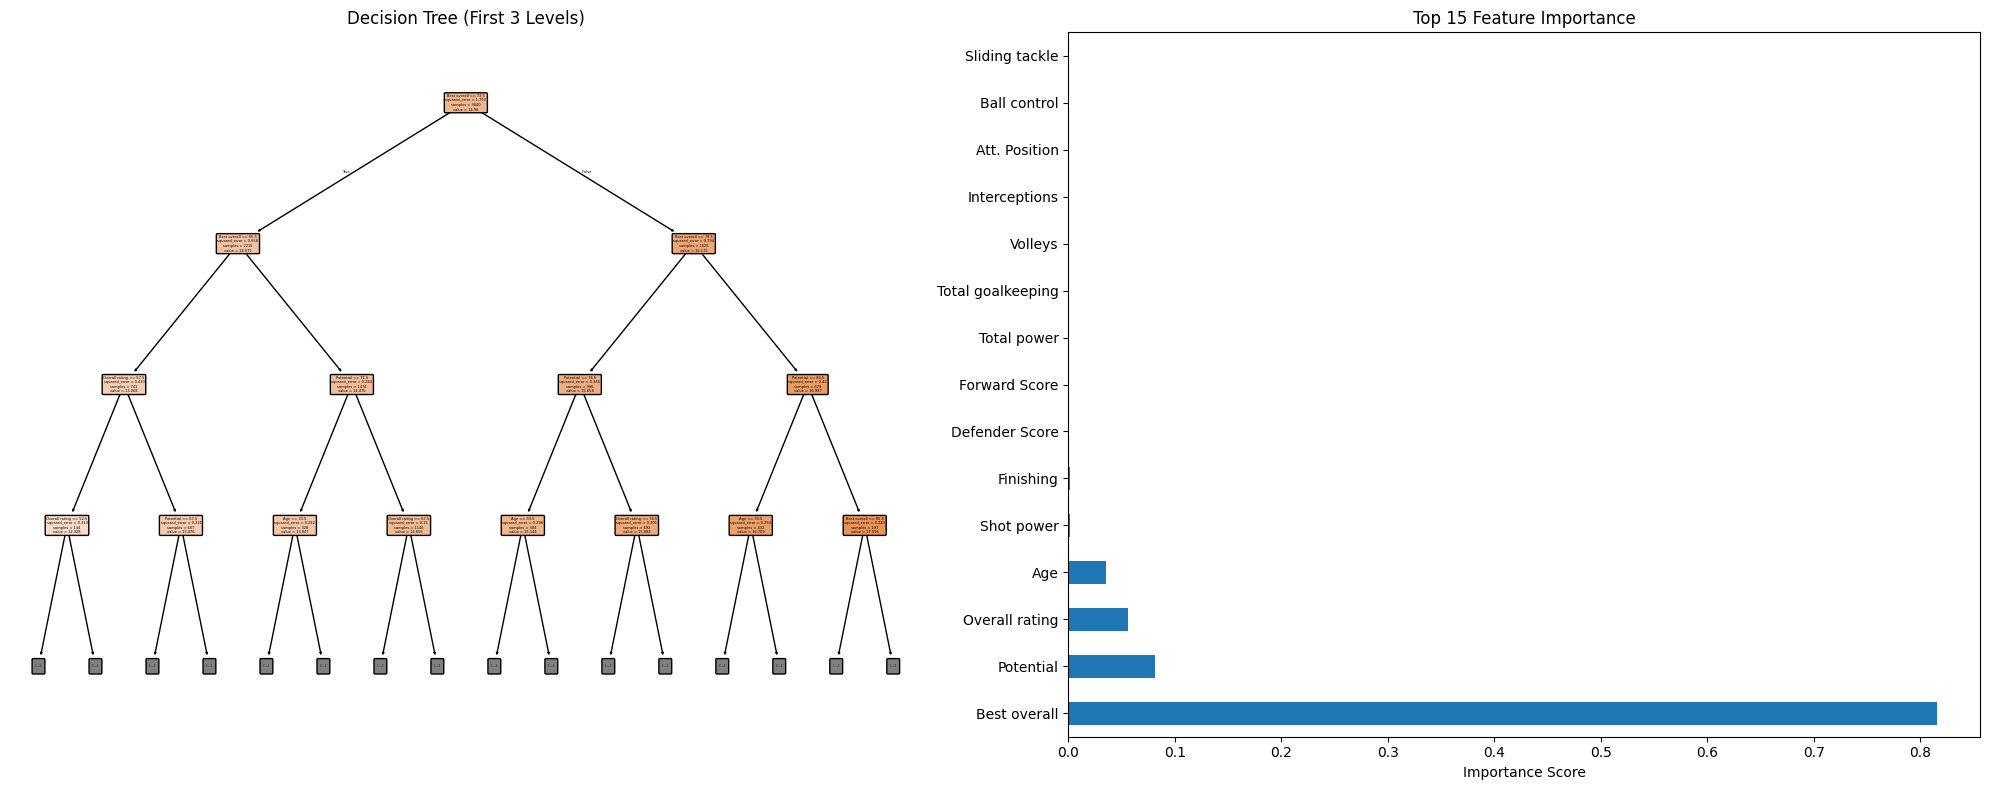

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import plot_tree

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

plot_tree(dt_model, max_depth=3, feature_names=X.columns, 
          filled=True, rounded=True, ax=ax1)
ax1.set_title('Decision Tree (First 3 Levels)')

importances = pd.Series(dt_model.feature_importances_, index=X.columns)
top_15_features = importances.sort_values(ascending=False)[:15]
top_15_features.plot(kind='barh', ax=ax2)
ax2.set_title('Top 15 Feature Importance')
ax2.set_xlabel('Importance Score')

plt.tight_layout()
plt.show()


In [ ]:
joblib.dump(dt_model, '../models/decision_tree_model_0.9853.pkl')


Decision Tree model saved successfully


I have studied that Decision tree is more likely to overfits

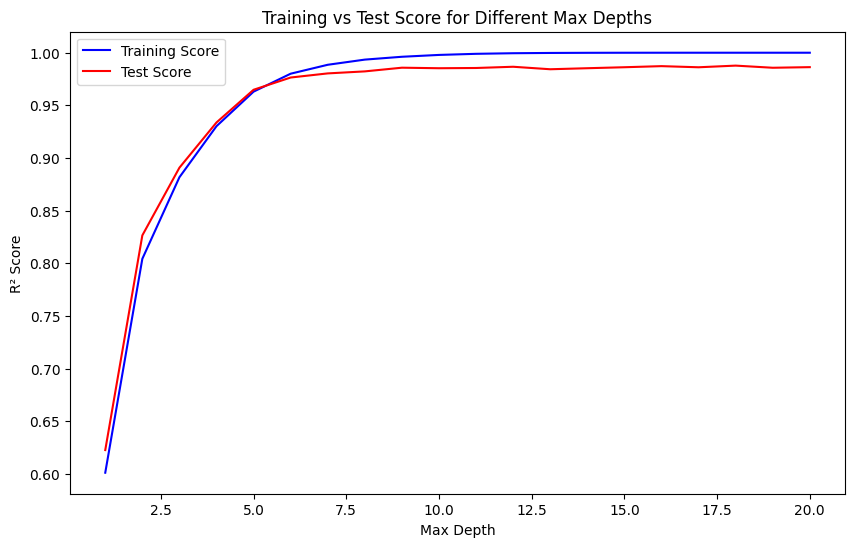

In [60]:
X = df.drop('Value', axis=1)
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_depths = np.arange(1, 21)

train_scores = []
test_scores = []

for depth in max_depths:
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    train_scores.append(dt_model.score(X_train, y_train))  
    test_scores.append(dt_model.score(X_test, y_test))  

plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Training Score', color='blue')
plt.plot(max_depths, test_scores, label='Test Score', color='red')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.title('Training vs Test Score for Different Max Depths')
plt.legend()
plt.show()


I think it overfits a little bit

## 5. Let's try Hyperparams tuning to get the best model

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [65]:
param_grid = {
    'max_depth': [2, 5, 10, 15, 20, 25, None],
    'min_samples_split': [2, 10, 20, 30, 40],
    'min_samples_leaf': [1, 5, 8, 10, 15],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

In [66]:
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


875 fits failed out of a total of 3500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
445 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\samir\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    va

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 15, 20, 25, None],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 5, 8, 10, 15],
                         'min_samples_split': [2, 10, 20, 30, 40]},
             scoring='neg_mean_squared_error')

In [67]:
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Score: -0.03138658197697279


In [68]:
best_dt_model = grid_search.best_estimator_

In [70]:
y_pred = best_dt_model.predict(X_test)
print(f"R² (Best Model- after gridserachCV): {r2_score(y_test, y_pred)}")
print(f"MSE (Best Model): {mean_squared_error(y_test, y_pred)}")

R² (Best Model- after gridserachCV): 0.9878301542912441
MSE (Best Model): 0.02242811806232218


 After hyperparameter tuning, we only achieved a marginal increase in model accuracy, suggesting that the additional computational cost may not be justified. so we going to finalize this notebook here. 